In this project stage you will do some data analysis on the integrated and cleaned table, to infer insights. This analysis is something of your own choosing. But it must involve one of the key techniques that we will cover in the class: classification, clustering, correlation discovery, anomaly detection, or OLAP-style exploration. I will discuss more in the class. 

What to submit

Submit the following on your group's website: 
- a CSV file storing Table E, the integrated table which is the output of project stage 4. 
- a pdf file that discusses the following issues: 
    - Statistics on Table E: specifically, what is the schema of Table E, how many tuples are in Table E? Give at least four sample tuples from Table E. 
    - What was the data analysis task that you wanted to do? (Example: we wanted to know if we can use the rest of the attributes to accurately predict the value of the attribute loan_repaid.) For that task, describe in detail the data analysis process that you went through. 
    - Give any accuracy numbers that you have obtained (such as precision and recall for your classification scheme). 
    - What did you learn/conclude from your data analysis? Were there any problems with the analysis process and with the data? 
    - If you have more time, what would you propose you can do next? 


visualize thi pyplot

calculate thi Numpy, Scipy

Scikit


#  Stage 5: Data Analysis #

#### Trang Ho, Thomas Ngo, Qinyuan Sun



## Dataset
In this project stage, we will do analysis on the merged table E of two tables AOM and IPEDS. The CSV file storing table E can be found here (NOTE: Put link here)

NOTE: put some info about the merged table, such as these data from year 2006..2014

Below is the schema of table E:

| Attribute name | Description                                                                   |
| -------------- |:-----------------------------------------------------------------------------:|
| year           | The year the individual attended the conference                               |
| pid            | The individual ID                                                             |
| ipeds_aid      | The individual's affiliation ID                                               |
| ipeds_name     | The individual's affiliation name                                             |                               
| ipeds_alias    | The individual's affiliation alias                                            |
| ipeds_city     | The individual's affiliation city                                             |
| ipeds_prov     | The individual's affiliation province                                         |
| ipeds_web      | The individual's affiliation website                                          |
| GROFFER        | The individual's affiliation graduate offering                                |
| CCSIZSET       | The individual's affiliation Size and Setting by Carnegie Classification 2010 |
| INSTSIZE       | The individual's affiliation institution size category                        |
| CBSATYPE       | The individual's affiliation CBSA Type Metropolitan or Micropolitan           |

NOTE: The possible categorical values of GROFFER, CCSIZSET, INSTSIZE, CBSATYPE can be found here (NOTE: Put link here)

There are total of 35585 tuples in table E. Below are 5 sample tupes from E

In [96]:
import os
import pandas as pd

working_dir = os.path.dirname(os.getcwd())
path_to_csv_dir = working_dir + os.sep + 'data'+ os.sep
data = pd.read_csv(path_to_csv_dir + '_aom_mapped_v2.csv')

data_size = len(data)

data.head(5)

,year,pid,ipeds_aid,ipeds_name,ipeds_alias,ipeds_city,ipeds_prov,ipeds_web,GROFFER,CCSIZSET,INSTSIZE,CBSATYPE
0,2007,296447,100663,university of alabama at birmingham,0,birmingham,alabama,www.uab.edu,1,15,4,1
1,2014,653507,100663,university of alabama at birmingham,0,birmingham,alabama,www.uab.edu,1,15,4,1
2,2008,287610,100663,university of alabama at birmingham,0,birmingham,alabama,www.uab.edu,1,15,4,1
3,2014,18785,100663,university of alabama at birmingham,0,birmingham,alabama,www.uab.edu,1,15,4,1
4,2009,66090,100663,university of alabama at birmingham,0,birmingham,alabama,www.uab.edu,1,15,4,1


## Analysis

In [2]:
import numpy as np
import scipy, sklearn, matplotlib
import matplotlib.pyplot as plt

In [3]:
data_by_year = {}
for year in range(2006, 2015):
    data_by_year[year] = data[data['year'] == year]

### Trend in number of attendees by year

[3657, 4134, 4158, 4119, 4059, 3718, 4003, 3620, 4117]


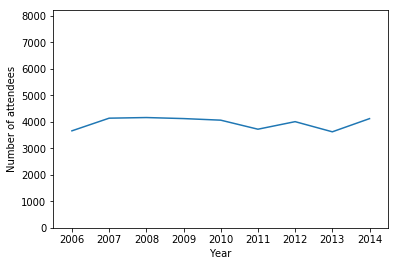

In [270]:
x = range(2006, 2015)
y = list(map(lambda key: len(data_by_year[key]), data_by_year.keys()))
print(y)
plt.plot(x, y)
plt.ylabel('Number of attendees')
plt.xlabel('Year')
plt.axis([2005.5, 2014.5, 0, 8200])
plt.show()


### Proportion of attendees by States

['california' 'new york' 'massachusetts' 'texas' 'pennsylvania' 'illinois'
 'florida' 'michigan' 'ohio' 'virginia' 'north carolina' 'georgia'
 'maryland' 'indiana' 'new jersey' 'minnesota' 'arizona' 'missouri'
 'washington' 'district of columbia' 'others']
[2907, 2833, 2758, 2689, 2456, 1873, 1590, 1512, 1430, 1132, 1113, 1106, 794, 772, 750, 735, 599, 594, 576, 572, 6794]


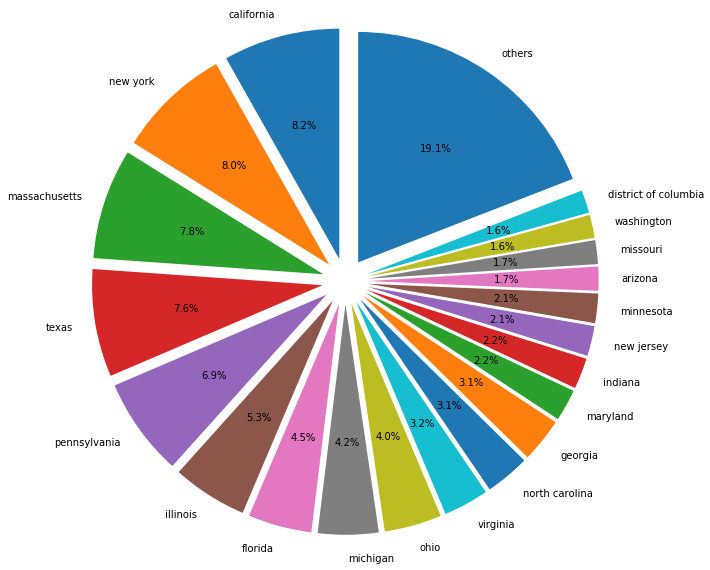

In [272]:
data_by_states = data.groupby("ipeds_prov").agg({"pid": 'count'}).sort_values('pid', ascending=False)
labels = data_by_states.head(20).reset_index()["ipeds_prov"].values
sizes = []

other_states = []
other_sizes = 0

for state in np.unique(data['ipeds_prov'].values):
    if state not in labels:
        other_states.append(state)

for state in labels:
    sizes.append(len(data[data['ipeds_prov'] == state]))

for state in other_states:
    other_sizes += len(data[data['ipeds_prov'] == state])
    
    
sizes.append(other_sizes)
labels = np.append(labels, ["others"])
print(labels)
print(sizes)
    
fig1, ax1 = plt.subplots()
# fig = plt.gcf()
fig1.set_size_inches(10,10)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, explode=[0.1] * len(labels))
# plt.legend(patches, labels, loc="best")
ax1.axis('equal') 
plt.show()

In [143]:
for year in range(2006, 2015):
    data_by_states_by_year = data_by_year[year].groupby("ipeds_prov").agg({"pid": 'count'}).sort_values('pid', ascending=False)
    labels = data_by_states.head(20).reset_index()["ipeds_prov"].values
    print(year, labels)

2006 ['california' 'new york' 'massachusetts' 'texas' 'pennsylvania' 'illinois'
 'florida' 'michigan' 'ohio' 'virginia' 'north carolina' 'georgia'
 'maryland' 'indiana' 'new jersey' 'minnesota' 'arizona' 'missouri'
 'washington' 'district of columbia']
2007 ['california' 'new york' 'massachusetts' 'texas' 'pennsylvania' 'illinois'
 'florida' 'michigan' 'ohio' 'virginia' 'north carolina' 'georgia'
 'maryland' 'indiana' 'new jersey' 'minnesota' 'arizona' 'missouri'
 'washington' 'district of columbia']
2008 ['california' 'new york' 'massachusetts' 'texas' 'pennsylvania' 'illinois'
 'florida' 'michigan' 'ohio' 'virginia' 'north carolina' 'georgia'
 'maryland' 'indiana' 'new jersey' 'minnesota' 'arizona' 'missouri'
 'washington' 'district of columbia']
2009 ['california' 'new york' 'massachusetts' 'texas' 'pennsylvania' 'illinois'
 'florida' 'michigan' 'ohio' 'virginia' 'north carolina' 'georgia'
 'maryland' 'indiana' 'new jersey' 'minnesota' 'arizona' 'missouri'
 'washington' 'district of

### How frequent individuals attended conferences from 2006-2014?

In [172]:
school_ids = np.unique(data['ipeds_aid'].values)
schools = []
for id in school_ids:
    row = data[data['ipeds_aid'] == id][['ipeds_aid', 'GROFFER', 'CCSIZSET', 'INSTSIZE', 'CBSATYPE']].head(1)
    row = dict(zip(row.keys(), row.values[0]))
    schools.append(row)

schools = pd.DataFrame(schools)
schools.head(5)

,CBSATYPE,CCSIZSET,GROFFER,INSTSIZE,ipeds_aid
0,1,15,1,4,100663
1,1,12,1,3,100706
2,1,16,1,5,100751
3,1,12,1,3,100830
4,1,15,1,5,100858


year
1    17972
2     5132
3     2244
4      105
5       37
6        2
dtype: int64
25492


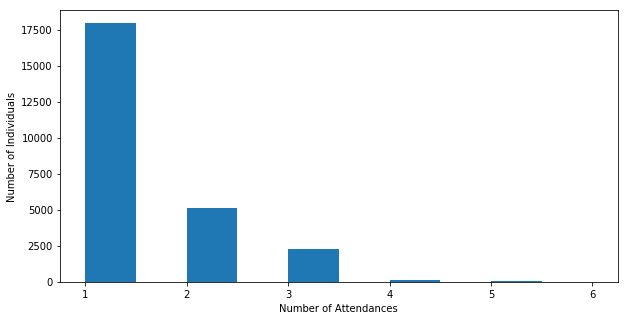

25492


In [273]:
individuals_per_year = data.groupby('pid').agg({"year": 'count'}).sort_values('year', ascending=False)
plt.figure(figsize=(10,5))
# individuals_per_year.plot.hist()
hist = plt.hist(individuals_per_year.values)
plt.xlabel("Number of Attendances")
plt.ylabel("Number of Individuals")
print(individuals_per_year.groupby('year').size())
print(len(individuals_per_year))

plt.show()
len(individuals_per_year)
print(17972 + 5132 + 2244 + 105 + 37 + 2)

### How frequent individuals attended conferences from 2006-2014? (grouped by GROFFER)

           pid
GROFFER       
1        35334
2          251


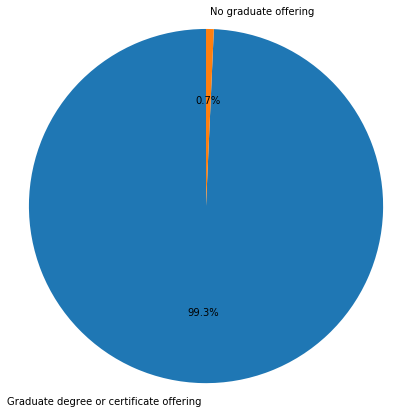

In [222]:
groffer_per_year = data.groupby('GROFFER').agg({"pid": 'count'}).sort_values('pid', ascending=False)
individuals_groffer_per_year = data.groupby(['pid', 'GROFFER']).agg({"year": 'count'}).sort_values('year', ascending=False)

print(groffer_per_year)

labels = ["Graduate degree or certificate offering", "No graduate offering"]
sizes = [35334, 251]

fig1, ax1 = plt.subplots()
# fig = plt.gcf()
fig1.set_size_inches(7,7)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, explode=[0.0, 0.0])
# plt.legend(patches, labels, loc="best")
ax1.axis('equal') 
plt.show()

### Number of conferences attendances from 2006-2014? (grouped by INSTSIZE)

            pid
INSTSIZE       
1           281
2          2287
3          3314
4          7702
5         22001


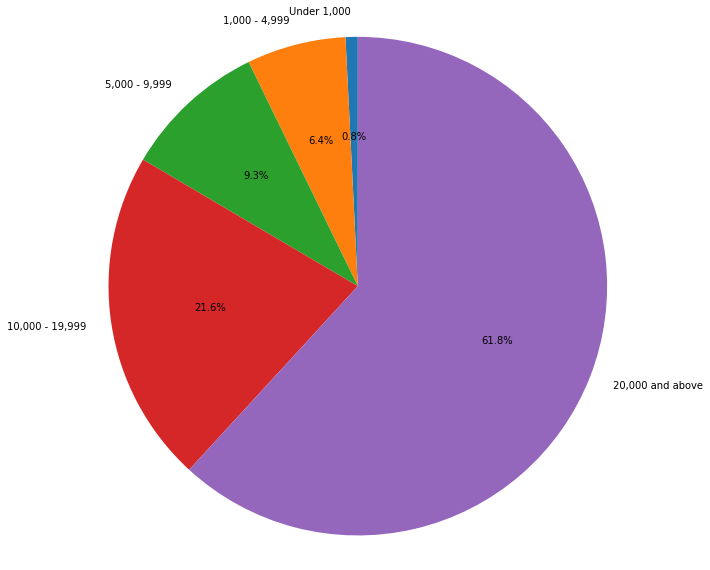

In [232]:
intstsize_per_year = data.groupby('INSTSIZE').agg({"pid": 'count'})
# individuals_groffer_per_year = data.groupby(['pid', 'INSTSIZE']).agg({"year": 'count'}).sort_values('year', ascending=False)

print(intstsize_per_year)

labels = ["Under 1,000", "1,000 - 4,999", "5,000 - 9,999", "10,000 - 19,999", "20,000 and above"]
sizes = intstsize_per_year.values

fig1, ax1 = plt.subplots()
# fig = plt.gcf()
fig1.set_size_inches(10,10)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
# plt.legend(patches, labels, loc="best")
ax1.axis('equal') 
plt.show()

### Number of conferences attendances from 2006-2014? (grouped by CBSATYPE)

            pid
CBSATYPE       
-2           80
 1        34105
 2         1400


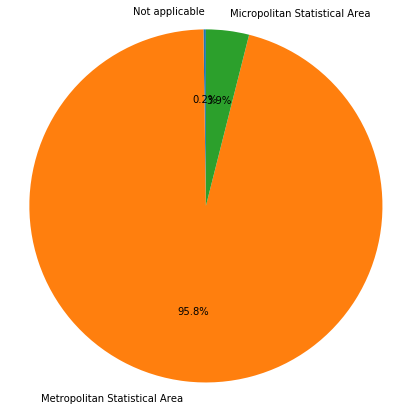

In [237]:
intstsize_per_year = data.groupby('CBSATYPE').agg({"pid": 'count'})
# individuals_groffer_per_year = data.groupby(['pid', 'INSTSIZE']).agg({"year": 'count'}).sort_values('year', ascending=False)

print(intstsize_per_year)

labels = ["Not applicable", "Metropolitan Statistical Area", "Micropolitan Statistical Area"]
sizes = intstsize_per_year.values

fig1, ax1 = plt.subplots()
# fig = plt.gcf()
fig1.set_size_inches(7,7)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
# plt.legend(patches, labels, loc="best")
ax1.axis('equal') 
plt.show()

### Number of conferences attendances from 2006-2014? (grouped by CCSIZSET)

            pid
CCSIZSET       
-3          177
-2          348
 2            7
 3            3
 5            2
 6           40
 7           26
 8           36
 9          312
 10         175
 11         512
 12        1260
 13        2333
 14        2614
 15        9083
 16       10452
 17        7984
 18         221
18
18


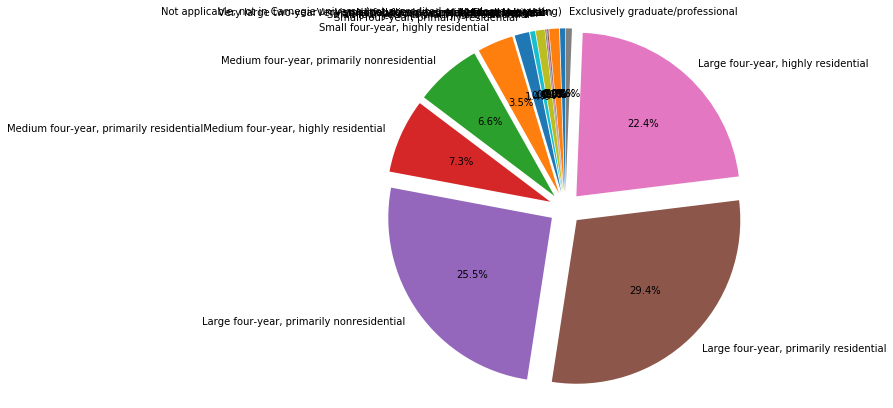

In [244]:
intstsize_per_year = data.groupby('CCSIZSET').agg({"pid": 'count'})
# individuals_groffer_per_year = data.groupby(['pid', 'INSTSIZE']).agg({"year": 'count'}).sort_values('year', ascending=False)

print(intstsize_per_year)

labels = ["Not applicable, not in Carnegie universe (not accredited or nondegree-granting)", 
         "Not applicable, special focus institution", "Very small two-year", "Small two-year", 
          "Large two-year", "Medium two-year", "Very large two-year"
         "Very small four-year, primarily nonresidential", "Very small four-year, primarily residential", 
         "Very small four-year, highly residential", "Small four-year, primarily nonresidential", "Small four-year, primarily residential",
         "Small four-year, highly residential", "Medium four-year, primarily nonresidential", "Medium four-year, primarily residential"
         "Medium four-year, highly residential", "Large four-year, primarily nonresidential",
         "Large four-year, primarily residential", "Large four-year, highly residential", "Exclusively graduate/professional"]

print(len(labels))
print(len(intstsize_per_year))
sizes = intstsize_per_year.values

fig1, ax1 = plt.subplots()
# fig = plt.gcf()
fig1.set_size_inches(7,7)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, explode = [0.1]*len(labels))
# plt.legend(patches, labels, loc="best")
ax1.axis('equal') 
plt.show()

In [247]:
len(data)

35585